In [2]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import google.colab
    IN_COLAB = True
    !pip3 install sympy==1.10
except:
    IN_COLAB = False

from icecream import ic

from sympy import *
from sympy import Abs
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print("Sympy version "+sympy.__version__)
init_printing(use_unicode=True)

a, x, g, X, G, tau = symbols('a x g X G tau', cls = Function)

Running Python: 3.12.6
Running Sympy: 1.13.2
Sympy version 1.13.2


## Define anticausal transforms

In [3]:
def laplace_transform_ac(g_lt_ac,t,s, NC = True):
    return laplace_transform(g_lt_ac.subs(tau,-t), t, -s, noconds = NC)

def inverse_laplace_transform_ac(G_ilt_ac,s,t):
    return (inverse_laplace_transform(G_ilt_ac.subs(s,-s),s,t).subs(t,-tau))*Heaviside(-tau,1)

# Check that get desired properties for basic ftns

## Delta ftn

In [11]:
from sympy import latex

#t = Symbol('t', positive=False) 
g = DiracDelta(t)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1.
print(f"The Laplace Transform of a delta ftn should be 1 - we get: {latex(G)}")

The Laplace Transform of a delta ftn should be 1 - we get: 1


## Step ftn

In [14]:
tau = Symbol('tau', negative=True) 
#t = Symbol('t', positive=True) 
# 
g = Heaviside(t,1)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1/s.
G

## Acausal Step ftn

In [16]:
g = 2*Heaviside(-tau,1)
G = laplace_transform_ac(g, t, s, True) # Checking the performance -  Should get -2/s.
G

## Causal exp

In [17]:
a = 11
g = a*sympy.exp(-t)*Heaviside(t)
g

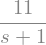

In [18]:
G = laplace_transform(g,t,s, noconds = True) # Checking the performance -  Should get 11/(s+1).
G

## Acausal exp

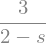

In [19]:
g_ac = 3*sympy.exp(2*tau)*Heaviside(-tau)
G_ac = laplace_transform_ac(g_ac,t,s, True) # Checking the performance -  Should get -3/(s-2)=3/(2-s).
G_ac

In [20]:
# confirm that inverse gives what we originally put in
g_temp = inverse_laplace_transform_ac(G_ac,s,t)
g_temp

## Anticausal Example 1 - consider 3 cases for the ROC

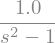

In [21]:
G1 = 0.5/(s-1) # pole at s = 1
G2 = -0.5/(s+1) # pole at s = -1
simplify(G1+G2)

### ROC A: $Re[s] < -1$

In [22]:
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(G2,s,t)
g_rocA

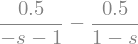

In [23]:
laplace_transform_ac(g_rocA,t,s, True)

### ROC B: $ -1 < Re[s] < 1$ 

In [24]:
g_rocB = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(G2,s,t)
g_rocB

### ROC C: $ Re[s] > 1$

In [25]:
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(G2,s,t)
g_rocC

## Anticausal Example 2 - consider 3 cases for the ROC

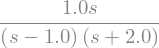

In [26]:
G1 = 1/3/(s-1) # pole at s = 1
G2 = 2/3/(s+2) # pole at s = -2
N(simplify(G1+G2),2)

In [27]:
# ROC A Re[s] < -2
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(G2,s,t)
N(g_rocA,4)

In [28]:
# ROC B -2 < Re[s] < 1 
g_rocB = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(G2,s,t)
N(g_rocB,4)

In [29]:
# ROC C Re[s] > 1
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(G2,s,t)
N(g_rocC,4)

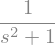

In [31]:
# Define the sine function
g_sine = sympy.sin(t) * Heaviside(t)

# Compute the Laplace transform
G_sine = laplace_transform(g_sine, t, s, noconds=True)

# Display the result
G_sine